In [1]:
from matplotlib.pyplot import *
import numpy as np
import healpy as hp
# from cmblensplus/utils/
import binning
import analysis as ana
# local
from utils import camb_clfile

In [2]:
%load_ext autoreload
%autoreload 2
import quest_tn as quest

In [3]:
cl_unl = camb_clfile("/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CAMB/BBSims_lenspotential.dat")

In [4]:
clpp = quest.RecoIni('litebird_tn.ini',nbin=30)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [5]:
simn = 500
fsky = .8

In [6]:
cl = np.array( [ clpp.get_qcl_sim(idx)/fsky - clpp.norm for idx in range(simn) ] )
print(np.shape(cl))

(500, 1025)


In [7]:
cb = np.array( [ binning.binning(cl[idx,:],clpp.mb) for idx in range(simn) ] )
print(np.shape(cb))

(500, 30)


In [8]:
mcb = np.mean(cb,axis=0) 
vcb = np.std(cb,axis=0)
Vcb = (np.mean(cb,axis=0)+binning.binning(clpp.norm,clpp.mb)) / ( np.sqrt((clpp.mb.bc+.5)*(clpp.Lmax-2)/clpp.nbin*.8) )

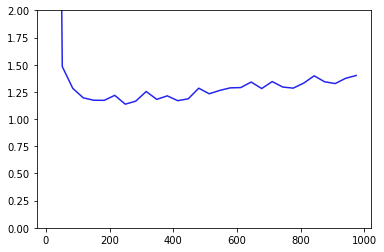

In [9]:
ylim(0,2)
plot(clpp.mb.bc,vcb/Vcb)

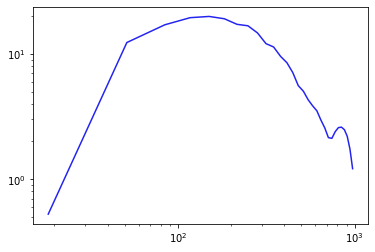

In [10]:
loglog(clpp.mb.bc,mcb/vcb)

In [11]:
print(np.sqrt(np.sum((mcb/vcb)**2)))

54.880228240049696


In [12]:
stat = ana.statistics(ocl=1.,scl=cb)
stat.get_amp(fcl=mcb)

In [13]:
1./stat.sA

44.763271960732716